This is a notebook to pull down all the information for figure 3 (ncbi hits). The design is to compair between each sample (barcode) instead of each flowcell as they sequenced the same thing. Therefore I just pulled all the ncbi hits for each flowcell for each barcode and merged them together according to the barcode.

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
import argparse
from ete3 import NCBITaxa 

In [2]:
ncbi = NCBITaxa()

In [3]:
# use argparse to do this
#BASEDIR = args.BASEDIR
BASEDIR = '/home/yiheng/data/Wagga_run2'

# here we define the folder name of the dataframe it created by capturing the folder from the BASDIR
folder_name = os.path.basename(BASEDIR)
column_name = folder_name.split('_')[-1]

In [4]:
# first check if the analysis folder is there
folder_list = 'analysis  basecalled_data  scripts  tracking  workspace'.split(' ')
for x in range(0,folder_list.count('')):
    folder_list.remove('')
#fix this test
if not set(os.listdir(os.path.abspath(BASEDIR))) == set (folder_list):
    print("Something wrong with basefolder. check it please.")

In [5]:
# get the dataframe there
dataframe = os.path.join(BASEDIR, 'analysis', 'summary_df_%s.tab' % folder_name)
sum_df = pd.read_csv(dataframe, sep='\t')

/home/yiheng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
sum_df.columns

Index(['read_id', 'passes_filtering', 'sequence_length_template',
       'mean_qscore_template', 'barcode_arrangement', 'barcode_score', 'kit',
       'variant', 'pc_survived', 'nl_survived', 'qseqid_rg', 'sseqid_rg',
       'evalue_rg', 'length_rg', 'pident_rg', 'nident_rg', 'sacc_rg',
       'staxids_rg', 'scomnames_rg', 'read_length_pc_x', 'qseqid_nt',
       'sseqid_nt', 'evalue_nt', 'length_nt', 'pident_nt', 'nident_nt',
       'sacc_nt', 'staxids_nt', 'scomnames_nt', 'read_length_pc_y'],
      dtype='object')

In [7]:
# fills the nan with T/F for easier handling
sum_df.sseqid_rg.fillna(False, inplace=True)
sum_df.sseqid_nt.fillna(False, inplace=True)
# filter out the rg blast hit
ntblasthit_reads = sum_df[(sum_df.sseqid_rg == False) & (sum_df.sseqid_nt != False) & (sum_df.passes_filtering == True) & (sum_df.pc_survived == True) & (sum_df.nl_survived == True)]
pd.set_option('display.max_columns', None)

#Removing unncessary columns from joint_NCBI_df_taxonomy
#I hard coded to select as it depends on what information you need
for columns in ['passes_filtering', 'sequence_length_template',
       'mean_qscore_template', 'barcode_score', 'kit',
       'variant', 'pc_survived', 'nl_survived', 'qseqid_rg', 'sseqid_rg',
       'evalue_rg', 'length_rg', 'pident_rg', 'nident_rg', 'sacc_rg',
       'staxids_rg', 'scomnames_rg', 'read_length_pc_x', 'qseqid_nt',
       'sseqid_nt', 'evalue_nt', 'length_nt', 'pident_nt', 'nident_nt',
       'sacc_nt','scomnames_nt', 'read_length_pc_y']:
    del ntblasthit_reads[columns] 

In [8]:
###########This block for barcodes order
# now everything left is what we want to plot out
# arrange different barcodes
# REMEMBER: This need to be manual check:
# barcode01 is Pst infected sample, barcode02 is Zymo sample, 03 is nill sample, 04 is co-infection sample and 05 is Pyre sample
new_barcodes = ['barcode01', 'barcode02', 'barcode03', 'barcode04', 'barcode05']
if column_name == 'run1':
    ntblasthit_barcode01 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode02']
    ntblasthit_barcode02 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode06']
    ntblasthit_barcode03 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode04']
    ntblasthit_barcode04 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode05']
    ntblasthit_barcode05 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode03']
    ntblasthit_barcode01.barcode_arrangement = ntblasthit_barcode01.barcode_arrangement.replace(to_replace='barcode02', value='barcode01')
    ntblasthit_reads.drop(ntblasthit_reads.index[ntblasthit_reads.barcode_arrangement.str.contains('barcode07')], inplace = True)
    ntblasthit_barcode01.barcode_arrangement = ntblasthit_barcode01.barcode_arrangement.replace(to_replace='barcode03', value='barcode07')
    ntblasthit_barcode01.barcode_arrangement = ntblasthit_barcode01.barcode_arrangement.replace(to_replace='barcode06', value='barcode02')
    ntblasthit_barcode01.barcode_arrangement = ntblasthit_barcode01.barcode_arrangement.replace(to_replace='barcode04', value='barcode03')
    ntblasthit_barcode01.barcode_arrangement = ntblasthit_barcode01.barcode_arrangement.replace(to_replace='barcode05', value='barcode04')
    ntblasthit_barcode01.barcode_arrangement = ntblasthit_barcode01.barcode_arrangement.replace(to_replace='barcode07', value='barcode05')

elif column_name == 'run2':
    # first delete the rows that contains the barcode we are going to replace
    # I think maybe better to first adjust the df to get rid of all the mis/unclassified reads so the df get smaller
    # and we do not need those reads for plotting
    
    ntblasthit_reads.drop(ntblasthit_reads.index[ntblasthit_reads.barcode_arrangement.str.contains('barcode01')], inplace = True)
    ntblasthit_reads.drop(ntblasthit_reads.index[ntblasthit_reads.barcode_arrangement.str.contains('barcode02')], inplace = True)
    ntblasthit_reads.drop(ntblasthit_reads.index[ntblasthit_reads.barcode_arrangement.str.contains('barcode03')], inplace = True)
    ntblasthit_reads.drop(ntblasthit_reads.index[ntblasthit_reads.barcode_arrangement.str.contains('barcode04')], inplace = True)
    ntblasthit_reads.drop(ntblasthit_reads.index[ntblasthit_reads.barcode_arrangement.str.contains('barcode05')], inplace = True)
    ntblasthit_reads.drop(ntblasthit_reads.index[ntblasthit_reads.barcode_arrangement.str.contains('unclassified')], inplace = True)
    old_barcodes = ['barcode07', 'barcode08', 'barcode09', 'barcode10', 'barcode11']
    for old_barcode, new_barcode in zip(old_barcodes, new_barcodes):
        ntblasthit_reads.loc\
        [ntblasthit_reads[ntblasthit_reads['barcode_arrangement'] == old_barcode].index,'barcode_arrangement']\
        = [new_barcode]
    #ntblasthit_reads['barcode_arrangement'] = ntblasthit_reads.barcode_arrangement.replace(to_replace='barcode07', value='barcode01')

    
elif column_name == 'FAH05432':
    ntblasthit_barcode01 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode01']
    ntblasthit_barcode02 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode02']
    ntblasthit_barcode03 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode03']
    ntblasthit_barcode04 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode04']
    ntblasthit_barcode05 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode05']
elif column_name == 'FAH05731':
    ntblasthit_barcode01 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode01']
    ntblasthit_barcode02 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode02']
    ntblasthit_barcode03 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode03']
    ntblasthit_barcode04 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode04']
    ntblasthit_barcode05 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement == 'barcode05']
else:
    pass



/home/yiheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/yiheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/yiheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/yiheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be s

In [9]:
# now just filter out all the reads that are not going to used for ploting
ntblasthit_reads_barcode01 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement.str.contains('barcode01')]
ntblasthit_reads_barcode02 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement.str.contains('barcode02')]
ntblasthit_reads_barcode03 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement.str.contains('barcode03')]
ntblasthit_reads_barcode04 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement.str.contains('barcode04')]
ntblasthit_reads_barcode05 = ntblasthit_reads[ntblasthit_reads.barcode_arrangement.str.contains('barcode05')]

# now concat them together. but remember that the index has to change to add the column for ncbi taxa
ntblasthit_reads_filtered_barcodes = pd.concat([ntblasthit_reads_barcode01, 
                                                ntblasthit_reads_barcode02, 
                                                ntblasthit_reads_barcode03, 
                                                ntblasthit_reads_barcode04, 
                                                ntblasthit_reads_barcode05], ignore_index=True)

In [10]:
ntblasthit_reads_filtered_barcodes

,read_id,barcode_arrangement,staxids_nt
0,d1296bae-fea2-4bf5-a44e-1c7abd61eff2,barcode01,200324
1,d37884ff-c005-4f4d-ab61-0873cc9ce300,barcode01,637910
2,ce12cd46-72cc-4545-a0d0-bc3e9e333668,barcode01,399742
3,d6cba2bc-ae22-479b-ac70-7d9b226adc80,barcode01,634500
4,7b462794-bac7-4448-8821-44ea8dbc99ad,barcode01,1441629
5,041dad7a-234c-44ba-b42a-b47629fff5e1,barcode01,168172
6,3ae54d23-8da4-4e6c-981d-8186e9ecae99,barcode01,549
7,c72734c0-c1ff-450d-8eee-e11e04da9e94,barcode01,418459
8,714f0cc4-3c18-4140-a2c2-8974a6a00445,barcode01,199201
9,269ddd05-e5b3-4765-a67e-ba4c35f9e318,barcode01,682634


In [11]:
# as the concate before will result the staxid into a string
# so now change the string back to float so it can be recognized by the NCBITaxa
for taxid in ntblasthit_reads_filtered_barcodes['staxids_nt']:
    if ';' in str(taxid):
        taxid = taxid.split(';')[0]
    else:
        pass
    float(taxid)

In [12]:
#Function to generate taxonomy columns based on NCBITaxa results for NCBI hit dataframe, 
def search_rank_output_name_append_column(df, staxid_column, rank_search):
    """Input df, staxid_column from same df and rank_search (a desired taxonomic rank 
    from each staxid's lineage), outputs taxonomic name corresponding to rank_search or 'Unclassified' if
    unavailable and appends to df row by row"""
    rank_list = []
    for read_index in range(0, len(staxid_column)):
        taxid = ''
        if ';' in str(staxid_column[read_index]):
            taxid = staxid_column[read_index].split(';')[0]
        else:
            taxid = staxid_column[read_index]
        
        taxid_lineage = ''
        taxid_lineage = ncbi.get_lineage(taxid)
        
        names = ''
        names = ncbi.get_taxid_translator(taxid_lineage)
        
        ranks = ''
        ranks = ncbi.get_rank(taxid_lineage) #Dict
        
        ranks2names = ''
        ranks2names = {ranks[k]:names[k] for k in names.keys() & ranks}
        
        if rank_search in ranks2names.keys():
            rank_list.append(ranks2names[rank_search])#if rank in dict, print name
        else:
            rank_list.append('Unclassified')
    df[rank_search] = rank_list
# NOTE: Appending is always slow, try and find a better way e.g df.apply to a column based on staxids column


In [13]:
#ntblasthit_reads_filtered_barcodes_added_TaxaRank = ntblasthit_reads_filtered_barcodes.copy()
rank_list = ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']
for rank in rank_list:
    search_rank_output_name_append_column(ntblasthit_reads_filtered_barcodes, 
                                          ntblasthit_reads_filtered_barcodes.staxids_nt, 
                                          rank)

In [14]:
ntblasthit_reads_filtered_barcodes

,read_id,barcode_arrangement,staxids_nt,superkingdom,phylum,class,order,family,genus,species
0,d1296bae-fea2-4bf5-a44e-1c7abd61eff2,barcode01,200324,Eukaryota,Basidiomycota,Pucciniomycetes,Pucciniales,Pucciniaceae,Puccinia,Puccinia coronata
1,d37884ff-c005-4f4d-ab61-0873cc9ce300,barcode01,637910,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Citrobacter,Citrobacter rodentium
2,ce12cd46-72cc-4545-a0d0-bc3e9e333668,barcode01,399742,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Enterobacter,Enterobacter sp. 638
3,d6cba2bc-ae22-479b-ac70-7d9b226adc80,barcode01,634500,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Erwiniaceae,Erwinia,Erwinia billingiae
4,7b462794-bac7-4448-8821-44ea8dbc99ad,barcode01,1441629,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,Pseudomonas cichorii
5,041dad7a-234c-44ba-b42a-b47629fff5e1,barcode01,168172,Eukaryota,Basidiomycota,Pucciniomycetes,Pucciniales,Pucciniaceae,Puccinia,Puccinia striiformis
6,3ae54d23-8da4-4e6c-981d-8186e9ecae99,barcode01,549,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Erwiniaceae,Pantoea,Pantoea agglomerans
7,c72734c0-c1ff-450d-8eee-e11e04da9e94,barcode01,418459,Eukaryota,Basidiomycota,Pucciniomycetes,Pucciniales,Pucciniaceae,Puccinia,Puccinia graminis
8,714f0cc4-3c18-4140-a2c2-8974a6a00445,barcode01,199201,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,Pseudomonas syringae
9,269ddd05-e5b3-4765-a67e-ba4c35f9e318,barcode01,682634,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Yersiniaceae,Serratia,Serratia plymuthica


In [15]:
# add the flowcell column just in case
ntblasthit_reads_filtered_barcodes = ntblasthit_reads_filtered_barcodes.assign(Flowcell = column_name)

In [16]:
ntblasthit_reads_filtered_barcodes.to_csv(r'/home/yiheng/analysis/WGS/%s_taxa.tab' % column_name, header=column_name, index=None, sep='\t')

In [17]:
#Defines a function to make manual adjustments to the NCBI taxonomic sorting
def manually_adjust_ncbi_taxonomy(rank_select, entry_select, ranks_to_edit, new_entry):
    """Select dataframe entries to edit by a specific rank (rank_select) 
    and entry related to that rank (entry_select), 
    provide a list of ranks to edit for those selected entries (ranks_to_edit),
    replace these ranks with a new entry (new_entry)"""
    if entry_select in list(ntblasthit_reads_filtered_barcodes[rank_select].unique()):
        selection = (ntblasthit_reads_filtered_barcodes[rank_select] == entry_select)
        selected_tax_ranks = ranks_to_edit
        for ranks in selected_tax_ranks:
            ntblasthit_reads_filtered_barcodes[ranks][selection] = new_entry

In [18]:
manually_adjust_ncbi_taxonomy('species', 
                            'Cloning vector lambda TXF97', 
                            ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus'], 
                            'Cloning vector lambda TXF97')

manually_adjust_ncbi_taxonomy('superkingdom', 
                            'Viruses', 
                            ['phylum', 'class'], 
                            'dsDNA viruses, no RNA stage')

In [19]:
#count pivot table of dataframe with taxonomic columns: 
#rows - rank names, columns - barcode, sorted by desired class
def generate_ncbi_taxonomy_pivot(tax_df, rank, bcs, num):
    """From tax_df, generate a pivot table listing num rank counts, sorted by bcs"""
    pivot_table = tax_df.pivot_table(values='order', 
                                            index=rank, 
                                            columns='barcode_arrangement', 
                                            aggfunc='count', 
                                            fill_value=0, 
                                            margins=True)
    pivot_table.columns.name = None
    return pivot_table.sort_values(bcs, axis=0, ascending=False).head(n=num)

In [20]:
generate_ncbi_taxonomy_pivot(ntblasthit_reads_filtered_barcodes, 'family','barcode04',20)

,barcode01,barcode02,barcode03,barcode04,barcode05,All
family,,,,,,
All,211.0,1853.0,15.0,52.0,25.0,2156.0
Pseudomonadaceae,77.0,990.0,0.0,16.0,2.0,1085.0
Eimeriidae,0.0,0.0,0.0,4.0,1.0,5.0
Muridae,0.0,0.0,0.0,2.0,0.0,2.0
Solanaceae,0.0,0.0,0.0,2.0,0.0,2.0
Fabaceae,1.0,1.0,0.0,2.0,1.0,5.0
Vitaceae,1.0,0.0,0.0,2.0,0.0,3.0
Leptosphaeriaceae,1.0,17.0,0.0,2.0,1.0,21.0
Threskiornithidae,0.0,0.0,0.0,1.0,0.0,1.0


In [21]:
# % pivot table of dataframe with taxonomic columns: 
#rows - rank names, columns - barcode, sorted by desired class
def generate_ncbi_taxonomy_pivot_pc(tax_df, rank, bcs, num):
    """From tax_df, generate a pivot table listing num rank %, sorted ascending by bcs"""
    pivot_table_pc = tax_df.pivot_table(values='order', 
                                            index=rank, 
                                            columns='barcode_arrangement', 
                                            aggfunc='count', 
                                            fill_value=0, 
                                            margins=True)
    pivot_table_pc.columns.name = None
    
    for brcs in pivot_table_pc.columns:
        pivot_table_pc[str(brcs) + '%'] = pivot_table_pc[brcs].apply(lambda x: (x / pivot_table_pc[brcs].loc['All'])*100)
    for brcs in pivot_table_pc.columns:
        if '%' not in brcs:
            pivot_table_pc.drop(brcs, axis=1, inplace=True)
    pivot_table_pc.drop('All', axis=0, inplace=True)

    pivot_table_pc2 = pivot_table_pc.sort_values(str(bcs) + '%', axis=0, ascending=False)
    return pivot_table_pc2.applymap(lambda x: '%.3f' % x).head(n=num)

In [22]:
generate_ncbi_taxonomy_pivot_pc(ntblasthit_reads_filtered_barcodes, 'species', 'barcode04', 20)

,barcode01%,barcode02%,barcode03%,barcode04%,barcode05%,All%
species,,,,,,
Pseudomonas syringae,16.114,36.643,0.000,25.000,4.000,33.720
Eimeria acervulina,0.000,0.000,0.000,5.769,0.000,0.139
Leptosphaeria maculans,0.000,0.216,0.000,3.846,0.000,0.278
Mus musculus,0.000,0.000,0.000,3.846,0.000,0.093
Solanum lycopersicum,0.000,0.000,0.000,3.846,0.000,0.093
Vitis vinifera,0.474,0.000,0.000,3.846,0.000,0.139
Acetobacter pasteurianus,0.000,0.000,0.000,1.923,0.000,0.046
Gongylonema pulchrum,0.000,0.000,0.000,1.923,0.000,0.046
Staphylococcus argenteus,0.000,0.000,0.000,1.923,0.000,0.046


In [23]:
#Assesses number of barcodes, generates necessary number of plots (even) and relevant indexing system
ncbiblast_barcodes = list(ntblasthit_reads_filtered_barcodes['barcode_arrangement'].unique())
no_of_subplots = len(ncbiblast_barcodes)+1

In [24]:
#Always 2 columns, bc-count/2 rows 
no_of_subplots_pair = [int(no_of_subplots/2), 2]

#Produce pairs of indices correlating to the coordinates of the subplots
subplot_coordinates = list(product(range(no_of_subplots_pair[0]), range(no_of_subplots_pair[1])))
subplot_coordinates_list = [list(l) for l in subplot_coordinates]
subplot_coordinates_list_rows = [i[0] for i in subplot_coordinates_list]
subplot_coordinates_list_columns = [i[1] for i in subplot_coordinates_list]

fig, ax = plt.subplots(no_of_subplots_pair[1], no_of_subplots_pair[0], figsize=(20, 6))

In [25]:
def get_color(x):
    x = x%10
    return ('#%02X%02X%02X' % (int(plt.cm.tab10.colors[x][0]*255),int(plt.cm.tab10.colors[x][1]*255),int(plt.cm.tab10.colors[x][2]*255)))

def applyTaxPlotStyle(ax_ind1, ax_ind2, bcs, rank):
    labels = ''
    labels = tuple(generate_ncbi_taxonomy_pivot_pc(ntblasthit_reads_filtered_barcodes, rank, bcs, 10)[bcs + '%'].index)
    y_pos = ''
    y_pos = np.arange(len(labels))
    sizes = ''
    sizes = tuple([float(i) for i in generate_ncbi_taxonomy_pivot_pc(ntblasthit_reads_filtered_barcodes, rank, bcs, 10)[bcs + '%']])
    
    ax[ax_ind1, ax_ind2].barh(y_pos, sizes, align='center', alpha=0.4, color=get_color(2*ax_ind2 + ax_ind1))
    ax[ax_ind1, ax_ind2].set_yticks(y_pos)
    ax[ax_ind1, ax_ind2].set_yticklabels(labels)
    ax[ax_ind1, ax_ind2].tick_params(top="off", right="off", left="off")
    ax[ax_ind1, ax_ind2].set_xlabel('% Total Reads Hitting NCBI')
    ax[ax_ind1, ax_ind2].set_xticks(range(0, 110, 10))
    ax[ax_ind1, ax_ind2].set_title(bcs)
    ax[ax_ind1, ax_ind2].invert_yaxis()
    ax[ax_ind1, ax_ind2].grid(b=None, which='major', axis='x', linestyle='dashed', linewidth=0.2)
    ax[ax_ind1, ax_ind2].annotate('E = 0.00001', 
             xy=(1.06, 0.3), xycoords='axes fraction', fontsize=10, xytext=(-20, -30), textcoords='offset points', 
             ha='right', va='bottom')
    
def generateTaxSubplots(search_rank):
    for ax_ind1, ax_ind2, bcs, in zip(subplot_coordinates_list_columns, subplot_coordinates_list_rows, ncbiblast_barcodes):
        applyTaxPlotStyle(ax_ind1, ax_ind2, bcs, search_rank)    

    if len(list(ntblasthit_reads_filtered_barcodes['barcode_arrangement'].unique())) != 0:
        plt.delaxes(ax[subplot_coordinates_list_columns[-1], subplot_coordinates_list_rows[-1]])
    
    plt.suptitle('Reads Hitting NCBI Database - % By ' + str(search_rank).title() + ' By Barcode', 
             fontsize='x-large',
             y=1.02,
             fontweight="bold")
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.4, hspace=0.4)
    plt.tight_layout()
    
    plt.savefig('/home/yiheng/analysis/WGS/figures/' + 'figure3_%s_%s.png' % (column_name, search_rank), bbox_inches='tight')
    plt.show()
            


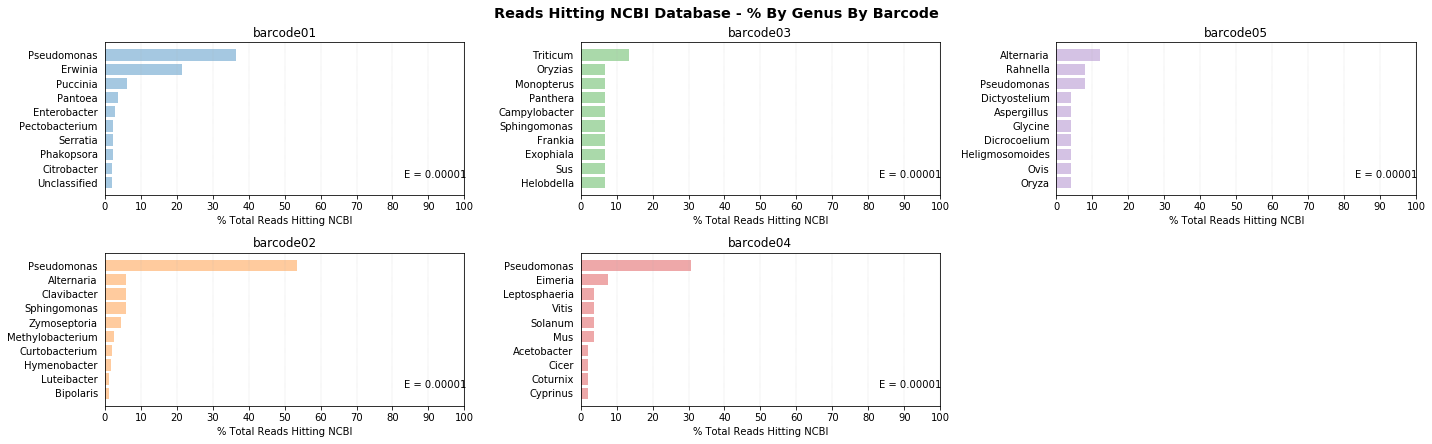

In [27]:
fig, ax = plt.subplots(no_of_subplots_pair[1], no_of_subplots_pair[0], figsize=(20, 6))
generateTaxSubplots('genus')

In [ ]:
df1=pd.DataFrame([[1, 2],[10, 1], [3, 4], [7, 8]], columns=['A', 'B'])
df2=pd.DataFrame([[1, 4],[3, 5]], columns=['A', 'B'])
# now replace the location use the index of each df selected from value by .loc function
# first select the value from df2 column A
for values in df2['A'].unique():
    # then locate the position in df1 and replace it by the VALUE of the position in df2
    df1.loc[df1[df1['A'] == (values)].index, 'B'] = df2.loc[df2[df2['A'] == (values)].index, 'B'].values

In [ ]:
df1